# Modelo Classification 

    


## 1er Modelo 

    - Predicccion contratacion Seguro de hogar 
    - Inputs, Saldo captacion + Nomina
    - Sin Normalizar

### DATA


In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [4]:
df.head(3)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.shape

(451374, 30)

In [6]:
df.size

13541220

In [7]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [8]:
df.dtypes 

cliente                 int64
saldo_captacion       float64
esta_carterizado       object
cliente_bbp            object
tipo_gestor            object
gestor                float64
cartera_patron         object
codigo_cartera        float64
digital_3_meses        object
camino_digital         object
saldo_financiacion    float64
saldo_ffii            float64
saldo_plp             float64
lp_dom_ingresos         int64
lp_tjta_cto             int64
lp_tjt_rev              int64
lp_rbos                 int64
lp_of_int               int64
marca_bp               object
marca_ccte             object
edad                  float64
seg_valor              object
seg_recorrido          object
dz                      int64
oficina                 int64
lp_seg_vida             int64
lp_seg_acc              int64
lp_seg_salud            int64
lp_seg_hogar            int64
lp_seg_auto             int64
dtype: object

In [9]:
# ================================================================================================
# Como primera opcion del modelo cogemos como Target el Seguro de hogar (Target Categorico)
# Como inputs cogemos si tiene nomina(categorico) y el saldo de ahorro captacion (float)
# Hacemos un describe de la variable captacion que esta catalogada como Float para ver sus valores

In [10]:
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [11]:
# Asignamos Target e Inputs

X = df[['saldo_captacion','lp_dom_ingresos']]
y= df['lp_seg_hogar']

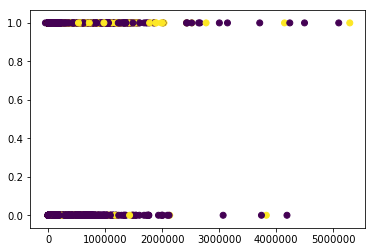

In [17]:
# ver como plotear esto para que se vea mejor. 
# plt.scatter(df["saldo_captacion"],df["lp_dom_ingresos"],c=df["lp_seg_hogar"])

### MODELO

In [12]:
# PASO 1 
# Load the library
from sklearn.linear_model import LogisticRegression

In [13]:
# PASO 2
# Create an instance of the classifier
clf=LogisticRegression()

In [14]:
# PASO 3 
# Fit the data
clf.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
# PASO 4 Prediccion SIEMPRE VA A SALIR 0 / 1  SI / NO
clf.predict([[100000,0 ]])

array([0])

### ENTRENAMIENTO Train-Test Split 


In [29]:
# PASO  Load the library
from sklearn.model_selection import train_test_split


In [30]:
# PASO 7 Create 2 groups each with input and labels  ( ESTO CORTAR Y PEGAR SIEMPRE.ES LO MISMO SIEMPRE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [31]:
# PASO 8 Fit only with training data
clf.fit(X_train,y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
# PASO 9 Haemos las prediciones de todo el X_test
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## Metric: Evaluation of Performance


In [33]:
# PASO 10 cargamos librerias de metricas

from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score


In [34]:
# PASO 11 Resultados de metricas
print ('accuracy_score = ', accuracy_score(y_test,clf.predict(X_test)))
print('f1_score =', f1_score(y_test,clf.predict(X_test)))
print('precision =', precision_score(y_test,clf.predict(X_test)))
print('roc_auc_score =', roc_auc_score(y_test,clf.predict(X_test)))


accuracy_score =  0.8700429793079002
f1_score = 0.001021798365122616
precision = 0.2727272727272727
roc_auc_score = 0.5001540882503981


## Metrics: Cross validation

In [35]:
# PASO 12 sacamos la metrica Accuracy iteratibamente con CRoss Validation
# Cargamos libreria
# Hacemos el Cross Validation
# Sacamos la Media.
from sklearn.model_selection import cross_val_score

cross_val_score(clf,X,y,cv=5,scoring="accuracy");

cross_val_score(clf,X,y,cv=5,scoring="precision");

print('accuracy_score_mean =', cross_val_score(clf,X,y,cv=5,scoring="accuracy").mean())

print('precision_mean = ',  cross_val_score(clf,X,y,cv=5,scoring="precision").mean())


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

accuracy_score_mean = 0.8696269617501458


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

precision_mean =  0.12577777777777777


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
